In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import random
from matplotlib import pyplot
from termcolor import colored
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

import keras
from keras.datasets import imdb
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [2]:
print(colored('\x1B[1mLoading dataset with first 10,000 most used words in the dataset.','green'))
top_words = 10000
(X_train, y_train), (X_Test, y_Test) = imdb.load_data(nb_words = top_words)

Loading dataset with first 10,000 most used words in the dataset.


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [3]:
print(colored('\x1B[1mSpliting data into training, validation and test sets:','green'))
X_valid, X_test, y_valid, y_test = train_test_split(X_Test, y_Test, test_size=.1, random_state=202)

X = np.concatenate((X_train, X_valid, X_test), axis=0)
y = np.concatenate((y_train, y_valid, y_test), axis=0)

Spliting data into training, validation and test sets:


In [4]:
print(colored('\x1B[1mShape of training, validation and test data:','green'))
print('Shape of X train',X_train.shape,'Shape of Y train',y_train.shape)
print('Shape of X valid',X_valid.shape,'Shape of Y valid',y_valid.shape)
print('Shape of X test',X_test.shape,'Shape of Y test',y_test.shape)

Shape of training, validation and test data:
Shape of X train (25000,) Shape of Y train (25000,)
Shape of X valid (22500,) Shape of Y valid (22500,)
Shape of X test (2500,) Shape of Y test (2500,)


In [5]:
print(colored('\x1B[1mNo. of target Classes: %d'%len(np.unique(y)),'green'))
print(np.unique(y))

No. of target Classes: 2
[0 1]


In [6]:
print(colored('\x1B[1mTotal number of words:','green'))
print(len(np.unique(np.hstack(X))))

Total number of words:
9998


In [7]:
print(colored('\x1B[1mReview length:','green'))
result = [len(x) for x in X]
print(colored("\x1B[1mMean of no. of word: %.2f with std dvtn: (%.2f)" % (np.mean(result), np.std(result)),'blue'))

Review length:
Mean of no. of word: 234.76 with std dvtn: (172.91)


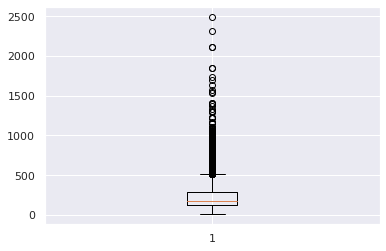

In [8]:
pyplot.boxplot(result)
pyplot.show()

In [9]:
max_len = len(max(X))
print(colored('\x1B[1mThe length of the largest sentence is %d'%max_len,'green'))

The length of the largest sentence is 374


In [10]:
print(colored('\x1B[1mWords with their indices and decoding the scentence as well','green'))
word_index = imdb.get_word_index()
index_word = {v : k for k,v in word_index.items()}
for i in range(0,5):
  x=random.choice(range(len(X)))
  print('Sentence No: %d'%x,'with Target: %d'%y[x])
  print("positve" if y[x]==1 else "negetive")
  print(X[x])
  print(" ".join([index_word[idx] for idx in X[x]]),'\n')

Words with their indices and decoding the scentence as well
Sentence No: 40408 with Target: 0
negetive
[1, 19, 4, 394, 116, 4, 373, 807, 4, 2, 7, 78, 486, 4, 2136, 114, 5, 120, 394, 22, 14, 47, 8, 30, 4, 249, 22, 13, 28, 126, 2395, 11, 61, 113, 5, 146, 4, 711, 7, 1556, 78, 102, 18, 4, 302, 36, 43, 3913, 1214, 541, 23, 84, 5, 183, 161, 1142, 4, 58, 8, 987, 6367, 5, 97, 318, 302, 290, 233, 91, 84, 231, 364, 352, 189, 1554, 33, 222, 81, 142, 40, 7, 2, 42, 142, 8, 97, 6, 4529, 4, 807, 16, 230, 39, 60, 542, 5, 4, 116, 16, 209, 458, 42, 781, 36, 43, 3913, 49, 156, 23, 6, 270, 5, 301, 28, 33, 12, 13, 3874, 207, 110, 128, 108, 39, 61, 22, 13, 707, 33, 396, 89, 122, 14, 126, 79, 6, 288, 766]
the film of getting love of tell period of and br do quality of broadway little to show getting you as there in at of sure you was one your influence this only acting to watching of easily br beat do characters but of instead from out occur meaning voice are great to seems nothing zombies of my in pay sized

In [11]:
print(colored('\x1B[1mpadding the scentences to a max length of scentence','green'))
print(colored('''\x1B[1mThis will add 0's to the smaller sequences\n''','green'))

X_train_pad = sequence.pad_sequences(X_train, maxlen=max_len)
X_valid_pad = sequence.pad_sequences(X_valid, maxlen=max_len)
X_test_pad = sequence.pad_sequences(X_test, maxlen=max_len)

padding the scentences to a max length of scentence
This will add 0's to the smaller sequences



In [12]:
print(colored('\x1B[1mShape of training, validation and test data after padding:','green'))
print('Shape of X train',X_train_pad.shape,'Shape of Y train',y_train.shape)
print('Shape of X valid',X_valid_pad.shape,'Shape of Y valid',y_valid.shape)
print('Shape of X test',X_test_pad.shape,'Shape of Y test',y_test.shape)

Shape of training, validation and test data after padding:
Shape of X train (25000, 374) Shape of Y train (25000,)
Shape of X valid (22500, 374) Shape of Y valid (22500,)
Shape of X test (2500, 374) Shape of Y test (2500,)


## Simple multi-layer perceptron model with a single hidden layer.

In [13]:
print(colored('\x1B[1mBuilding the Simple multi-layer perceptron model','green'))
model1 = Sequential()
model1.add(Embedding(top_words, 32, input_length = max_len))
model1.add(Flatten())
model1.add(Dense(250, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

Building the Simple multi-layer perceptron model


In [14]:
print(colored('\x1B[1mCompiling Simple multi-layer model','green'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Compiling Simple multi-layer model


In [15]:
print(colored('\x1B[1mSummary of Simple multi-layer model','green'))
print(model1.summary())

Summary of Simple multi-layer model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 374, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 11968)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               2992250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 3,312,501
Trainable params: 3,312,501
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
print(colored('\x1B[1mSetting earlystoping','blue'))
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min', min_lr=1e-6)

Setting earlystoping


In [17]:
print(colored('\x1B[1mFittting the model','green'))
history1 =  model1.fit(X_train_pad, y_train, validation_data=(X_valid_pad, y_valid) , epochs=20, batch_size=64, verbose=2,callbacks=[earlyStopping, reduce_lr_loss])

Fittting the model
Epoch 1/20
391/391 - 37s - loss: 0.4187 - accuracy: 0.7810 - val_loss: 0.2908 - val_accuracy: 0.8773
Epoch 2/20
391/391 - 21s - loss: 0.1103 - accuracy: 0.9605 - val_loss: 0.3703 - val_accuracy: 0.8576
Epoch 3/20
391/391 - 21s - loss: 0.0171 - accuracy: 0.9956 - val_loss: 0.5058 - val_accuracy: 0.8600
Epoch 4/20
391/391 - 21s - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.5688 - val_accuracy: 0.8654
Epoch 5/20
391/391 - 21s - loss: 4.2171e-04 - accuracy: 1.0000 - val_loss: 0.5926 - val_accuracy: 0.8644
Epoch 6/20
391/391 - 21s - loss: 1.8113e-04 - accuracy: 1.0000 - val_loss: 0.6142 - val_accuracy: 0.8658
Epoch 7/20
391/391 - 22s - loss: 1.1625e-04 - accuracy: 1.0000 - val_loss: 0.6322 - val_accuracy: 0.8663
Epoch 8/20
391/391 - 21s - loss: 8.1032e-05 - accuracy: 1.0000 - val_loss: 0.6485 - val_accuracy: 0.8665

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 9/20
391/391 - 22s - loss: 6.2988e-05 - accuracy: 1.0000 - val_loss: 

In [18]:
print(colored('\x1B[1mFittting the model','green'))
scores = model1.evaluate(X_test_pad, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Fittting the model
Accuracy: 85.44%


			Accuracy analysis of Simple multi-layer perceptron-Model



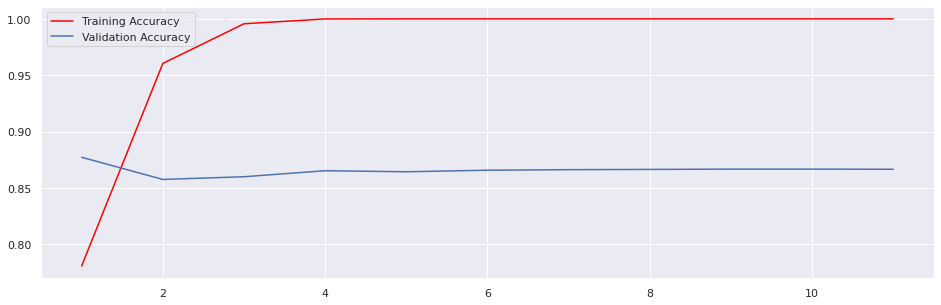

In [19]:
print(colored('\x1B[1m\t\t\tAccuracy analysis of Simple multi-layer perceptron-Model\n','green'))
plt.figure(figsize=(16,5))
epochs = range(1, len(history1.history['accuracy'])+1)
plt.plot(epochs, history1.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history1.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

			Loss analysis graph of Simple multi-layer perceptron-Model



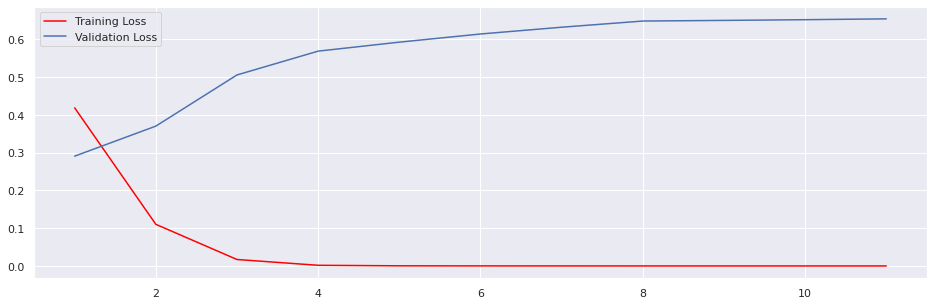

In [20]:
print(colored('\x1B[1m\t\t\tLoss analysis graph of Simple multi-layer perceptron-Model\n','green'))
plt.figure(figsize=(16,5))
epochs = range(1, len(history1.history['accuracy'])+1)
plt.plot(epochs, history1.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history1.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

In [21]:
print(colored('\x1B[1mClassification Report','green'))
print(classification_report(y_test, model1.predict_classes(X_test_pad)))

Classification Report


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1228
           1       0.86      0.85      0.86      1272

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



In [22]:
cm=confusion_matrix(y_test,model1.predict_classes(X_test_pad))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


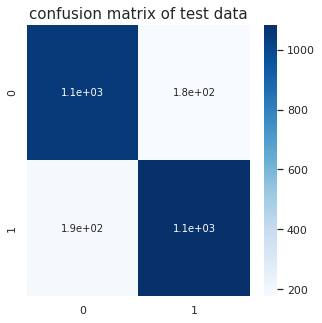

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,xticklabels=['0','1'],yticklabels=['0','1'],annot=True,cmap='Blues')
plt.title('confusion matrix of test data',fontdict={'size':15})
plt.show()

In [24]:
print(colored('\x1B[1mPrediciting via Simple multi-layer perceptron model','green'))
y_pred = model1.predict_classes(X_test_pad)
correct = [pred == true for pred, true in zip(y_pred, y_test)]

Prediciting via Simple multi-layer perceptron model


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
print(colored('\x1B[1mGetting miscalssified classes','green'))
true_c = []
false = []
false_c = []

for i in range(len(correct)):
  if (correct[i]) != True:
    false.append(i)
    true_c.append(y_test[i])
    false_c.append(y_pred[i])

Getting miscalssified classes


In [26]:
print(colored('\x1B[1mTotal number of miscalssified classes from test set are %d amoung %d classes'%(len(false_c),len(X_test)),'green'))

Total number of miscalssified classes from test set are 364 amoung 2500 classes


## One-Dimensional Convolutional Neural Network Model

In [27]:
print(colored('\x1B[1mBuilding of One-Dimensional Convolutional Neural Network Model','green'))
model2 = Sequential()
model2.add(Embedding(top_words, 32, input_length = max_len))
model2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(250, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

Building of One-Dimensional Convolutional Neural Network Model


In [28]:
print(colored('\x1B[1mCompling One-Dimensional Convolutional Neural Network Model','green'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Compling One-Dimensional Convolutional Neural Network Model


In [29]:
print(colored('\x1B[1mCompling of One-Dimensional Convolutional Neural Network Model','green'))
model2.summary()

Compling of One-Dimensional Convolutional Neural Network Model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 374, 32)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 374, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 187, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5984)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               1496250   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 1,819,605
Trainable params: 1,819,605
Non-t

In [30]:
print(colored('\x1B[1mSetting earlystoping','blue'))
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min', min_lr=1e-6)

Setting earlystoping


In [31]:
print(colored('\x1B[1mFittting the model','green'))
history2 =  model2.fit(X_train_pad, y_train, validation_data=(X_valid_pad, y_valid) , epochs=20, batch_size=64, verbose=2,callbacks=[earlyStopping, reduce_lr_loss])

Fittting the model
Epoch 1/20
391/391 - 27s - loss: 0.3979 - accuracy: 0.7937 - val_loss: 0.2802 - val_accuracy: 0.8837
Epoch 2/20
391/391 - 23s - loss: 0.1730 - accuracy: 0.9348 - val_loss: 0.2873 - val_accuracy: 0.8820
Epoch 3/20
391/391 - 24s - loss: 0.0809 - accuracy: 0.9744 - val_loss: 0.3445 - val_accuracy: 0.8776
Epoch 4/20
391/391 - 23s - loss: 0.0265 - accuracy: 0.9934 - val_loss: 0.4591 - val_accuracy: 0.8733
Epoch 5/20
391/391 - 23s - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.6265 - val_accuracy: 0.8744
Epoch 6/20
391/391 - 24s - loss: 7.8825e-04 - accuracy: 0.9999 - val_loss: 0.6909 - val_accuracy: 0.8737
Epoch 7/20
391/391 - 24s - loss: 2.6367e-04 - accuracy: 1.0000 - val_loss: 0.7479 - val_accuracy: 0.8752
Epoch 8/20
391/391 - 24s - loss: 1.1454e-04 - accuracy: 1.0000 - val_loss: 0.7993 - val_accuracy: 0.8754

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 9/20
391/391 - 24s - loss: 7.4119e-05 - accuracy: 1.0000 - val_loss: 0.80

In [32]:
print(colored('\x1B[1mFittting the model2','green'))
scores = model2.evaluate(X_test_pad, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Fittting the model2
Accuracy: 87.92%


				Accuracy analysis of 1-D CNN-Model



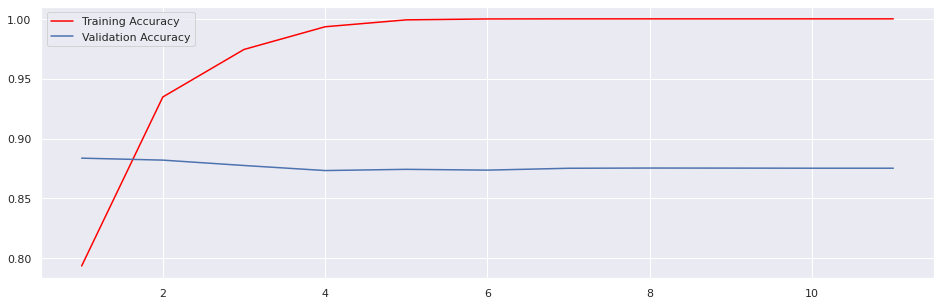

In [33]:
print(colored('\x1B[1m\t\t\t\tAccuracy analysis of 1-D CNN-Model\n','green'))
plt.figure(figsize=(16,5))
epochs = range(1, len(history2.history['accuracy'])+1)
plt.plot(epochs, history2.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history2.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

				Loss analysis graph of 1-D CNN-Model



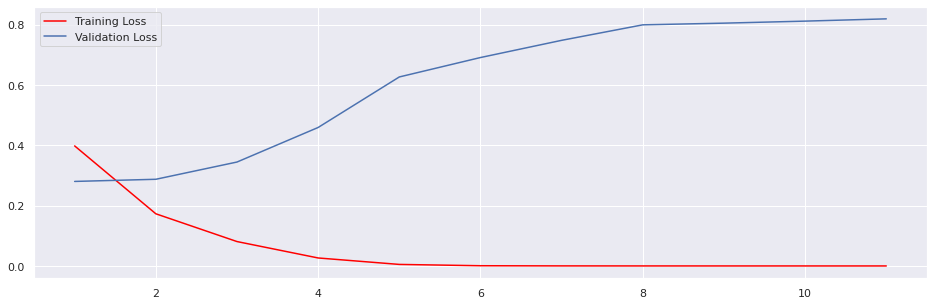

In [34]:
print(colored('\x1B[1m\t\t\t\tLoss analysis graph of 1-D CNN-Model\n','green'))
plt.figure(figsize=(16,5))
epochs = range(1, len(history2.history['accuracy'])+1)
plt.plot(epochs, history2.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history2.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

In [35]:
print(classification_report(y_test, model2.predict_classes(X_test_pad)))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1228
           1       0.88      0.88      0.88      1272

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



In [36]:
cm=confusion_matrix(y_test,model2.predict_classes(X_test_pad))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


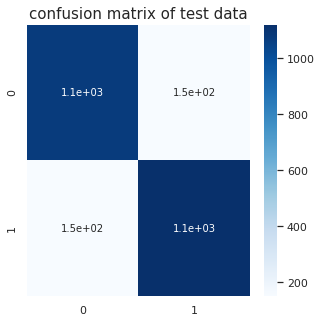

In [37]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,xticklabels=['0','1'],yticklabels=['0','1'],annot=True,cmap='Blues')
plt.title('confusion matrix of test data',fontdict={'size':15})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


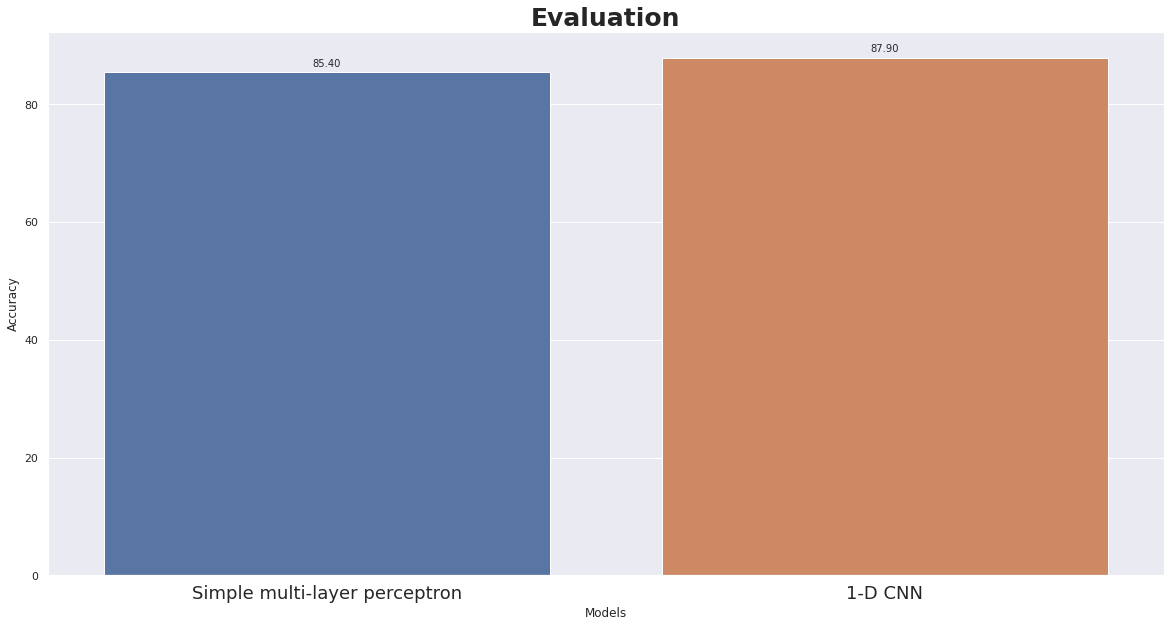

In [38]:
accuracy_simple_rnn = model1.evaluate(X_test_pad, y_test, verbose=0)
accuracy_lstm = model2.evaluate(X_test_pad, y_test, verbose=0)

conclusion = pd.DataFrame({'Models':['Simple multi-layer perceptron', '1-D CNN'], 
              'Accuracy':[accuracy_simple_rnn[1]*100, accuracy_lstm[1]*100]})
conclusion['Accuracy'] = conclusion['Accuracy'].apply(lambda x: round(x,1))
conclusion.sort_values(by='Accuracy', inplace = True, ascending = True)

plt.figure(figsize=(20,10))
seaborn_plot = sns.barplot(conclusion.Models,conclusion.Accuracy)
for p in seaborn_plot.patches:
    seaborn_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title("Evaluation", weight='bold', size=25)
plt.xticks(size=18)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

In [39]:
conclusion

,Models,Accuracy
0,Simple multi-layer perceptron,85.4
1,1-D CNN,87.9


### Since 1-D CNN Model gives best accuracy, so making predicitons using 1-D CNN model i.e. model2

In [40]:
print(colored('\x1B[1mPrediciting via 1-D CNN model','green'))
y_pred = model2.predict_classes(X_test_pad)
correct = [pred == true for pred, true in zip(y_pred, y_test)]

Prediciting via 1-D CNN model


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
print(colored('\x1B[1mGetting miscalssified classes','green'))
true_c = []
false = []
false_c = []

for i in range(len(correct)):
  if (correct[i]) != True:
    false.append(i)
    true_c.append(y_test[i])
    false_c.append(y_pred[i])

Getting miscalssified classes


In [42]:
print(colored('\x1B[1mTotal number of miscalssified classes from test set are %d amoung %d classes'%(len(false_c),len(X_test)),'green'))

Total number of miscalssified classes from test set are 302 amoung 2500 classes


In [43]:
print(colored('\x1B[1mPredicition\n','green'))
for i in range(5):
  x=random.choice(range(len(X_test)))
  y_pred = np.argmax(model2.predict_classes(X_test_pad))
  print('\x1B[1m\nReviews with Actual Target: %d'%y_test[x],"positve" if y_test[x]==1 else "negetive")
  print('Reviews with Predicted Target: %d'%y_pred,"positve" if y_pred==1 else "negetive")
  print("Correctly classified" if y_pred==y_test[x] else "Inorrectly classified")
  print('Reviews')
  print(" ".join([index_word[idx] for idx in X_test[x]]))

Predicition



/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Reviews with Actual Target: 0 negetive
Reviews with Predicted Target: 0 negetive
Correctly classified
Reviews
the was character is esther br characters to use of directly child on not as on with tell cult or of and son br of you that with time anyway to turn in could even come watching see colin child books br funny sounds was least scene for takes that with him narrative reason career in character are is establishment hard no director fan it dies i i of films than amy to nothing situations think conduct isolation br across of period may films with emotional to they gets time 11 i i was lead what have than time first of script angry and to position good br of feeble because avoid serve that action at very not but we of forget acted was then also that

Reviews with Actual Target: 1 positve
Reviews with Predicted Target: 0 negetive
Inorrectly classified
Reviews
the was rather named for more it ironic show of white br as you world city that it so insulting first of free br disappointed d